# <font color='blue'>GUIA RÁPIDO DE ML</font>

### Primeiro Data Set - Titanic

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn import (ensemble, preprocessing, tree)

In [4]:
from sklearn.metrics import (auc, confusion_matrix, roc_auc_score, roc_curve)

In [5]:
from sklearn.model_selection import (train_test_split, StratifiedKFold)

In [6]:
! pip install yellowbrick

In [7]:
from yellowbrick.classifier import (ConfusionMatrix, ROCAUC)

In [8]:
from yellowbrick.model_selection import (LearningCurve)

In [9]:
url = ('http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls')

In [10]:
df = pd.read_excel(url)

In [11]:
orig_df = df

In [12]:
type(df)

pandas.core.frame.DataFrame

In [13]:
print(df.shape)

(1309, 14)


In [14]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [15]:
df.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [16]:
df.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [17]:
pd.__version__

'0.24.2'

In [18]:
import matplotlib

In [19]:
matplotlib.__version__

'3.0.3'

In [20]:
conda install -c conda-forge pandas-profiling

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [21]:
import pandas_profiling


In [22]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [23]:
profile = pandas_profiling.ProfileReport(df); profile

Number of variables,14
Number of observations,1309
Total Missing (%),21.0%
Total size in memory,143.2 KiB
Average record size in memory,112.1 B
Numeric,6
Categorical,7
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [24]:
profile.to_file("your_report_titanic.html")

In [25]:
import seaborn as sns

In [26]:
?sns.boxplot

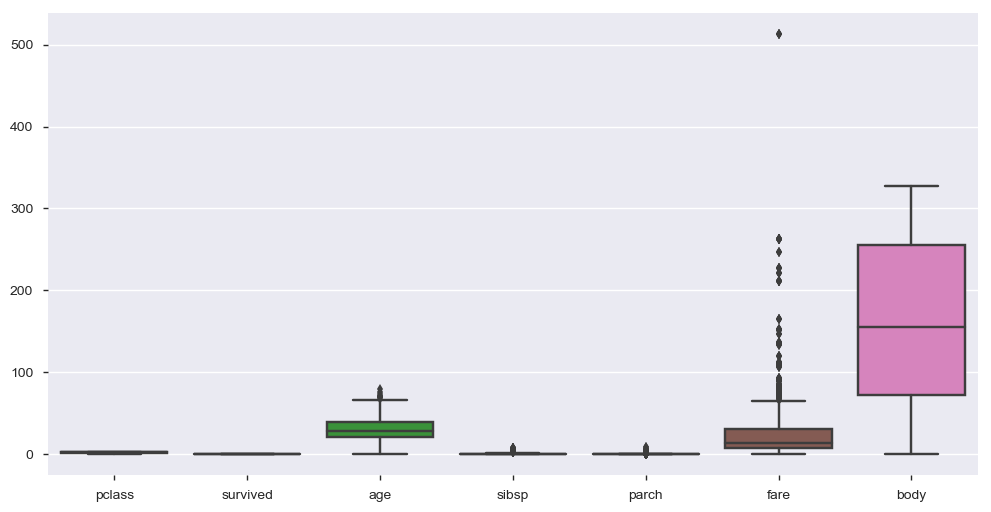

In [27]:
fig, ax = plt.subplots(figsize=(12,6))
sns.boxplot(data=df)


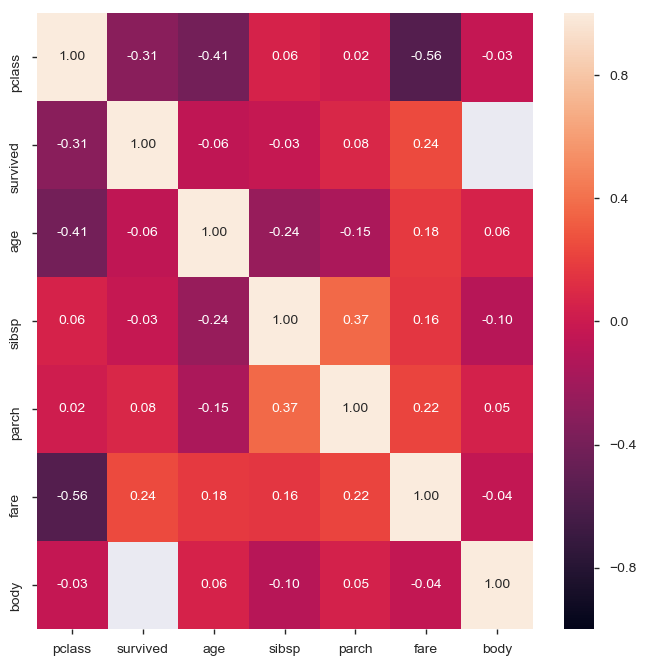

In [88]:
fig, ax=plt.subplots(figsize=(8, 8))
ax = sns.heatmap(df.corr(), fmt='.2f', annot=True, ax=ax, vmin=-1, vmax=1)
fig.savefig('mlpr_0611.png', dpi=300, bbox_inches='tight')

In [28]:
df.describe().iloc[:, :2]

,pclass,survived
count,1309.000000,1309.000000
mean,2.294882,0.381971
std,0.837836,0.486055
min,1.000000,0.000000
25%,2.000000,0.000000
50%,3.000000,0.000000
75%,3.000000,1.000000
max,3.000000,1.000000


In [29]:
df.isnull().sum() # soma os valores nulos de cada col

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [30]:
porc_miss = df.isnull().mean()*100

In [31]:
round(porc_miss, 0)

pclass        0.0
survived      0.0
name          0.0
sex           0.0
age          20.0
sibsp         0.0
parch         0.0
ticket        0.0
fare          0.0
cabin        77.0
embarked      0.0
boat         63.0
body         91.0
home.dest    43.0
dtype: float64

In [32]:
! pip install missingno

In [33]:
import missingno as msno

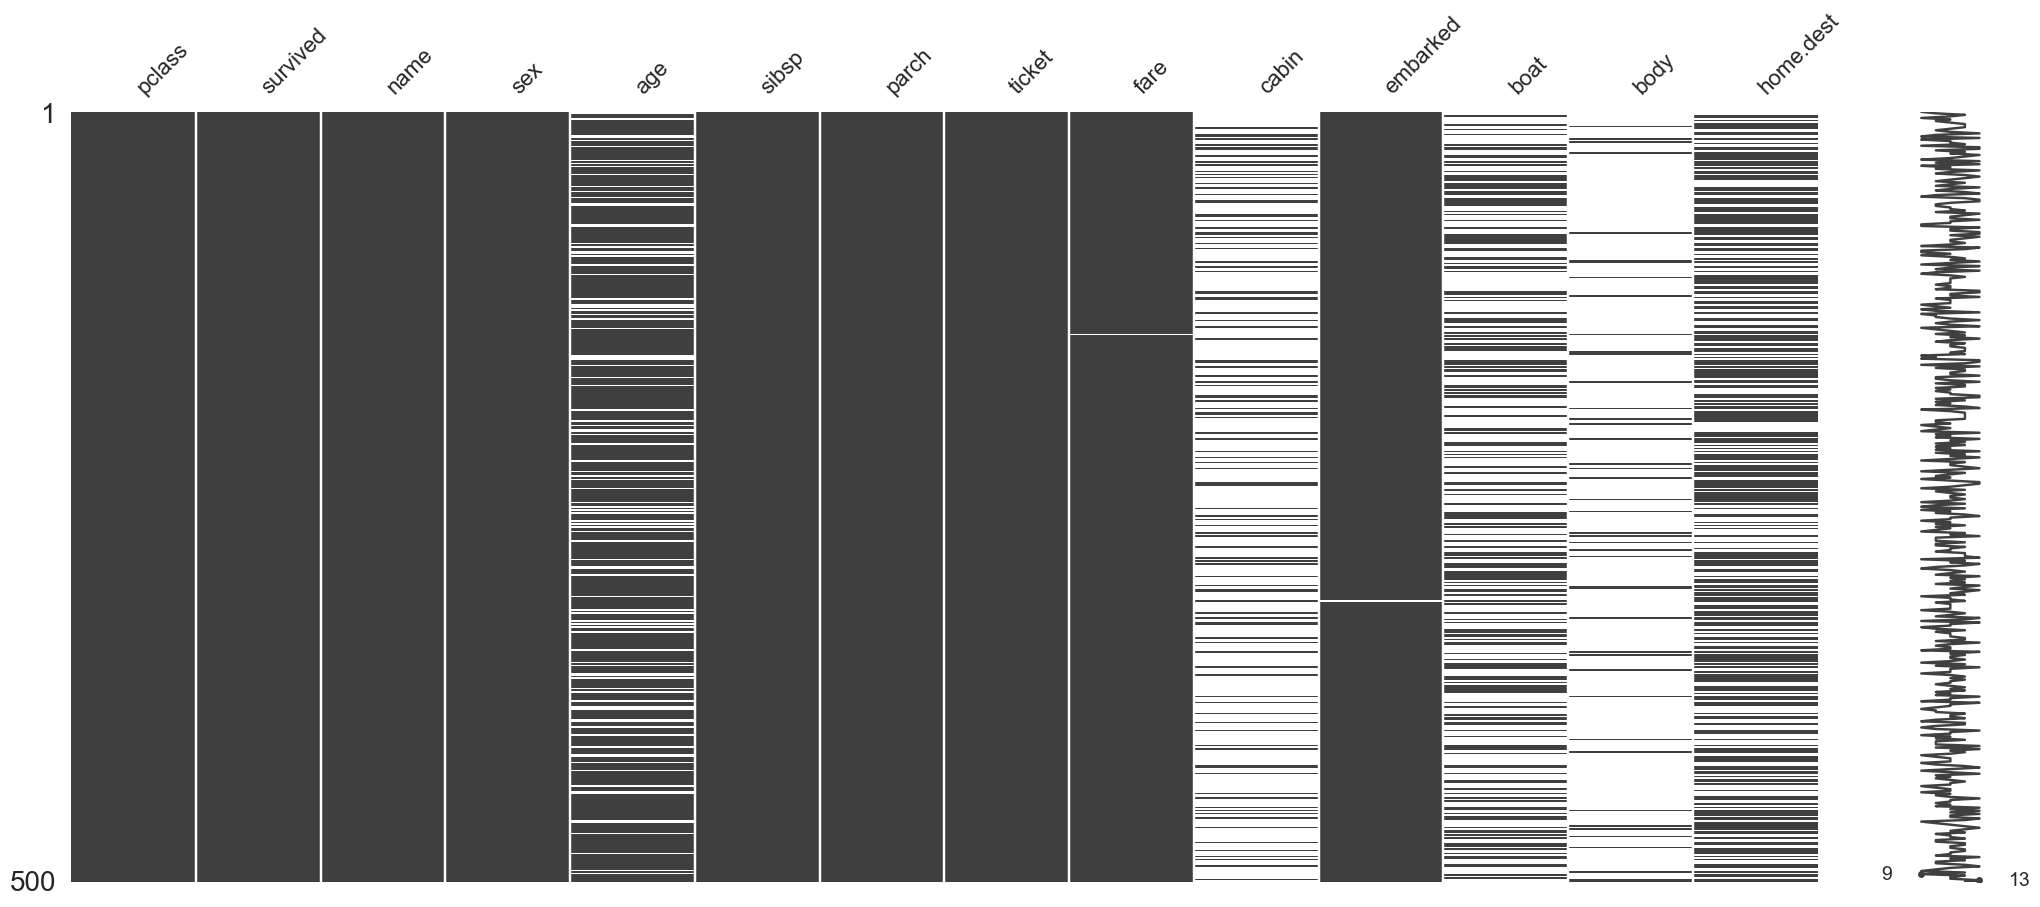

In [34]:
ax = msno.matrix(orig_df.sample(500))
ax.get_figure().savefig('mlpr_0401.png')

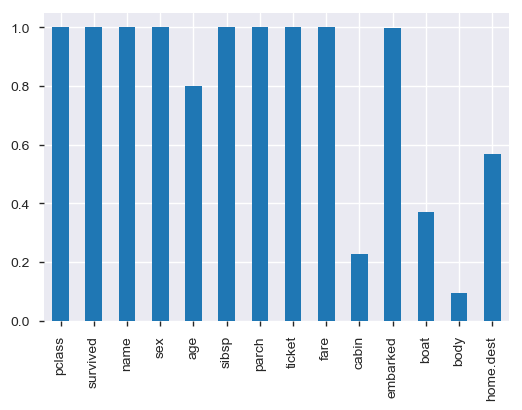

In [35]:
fig, ax = plt.subplots(figsize=(6, 4))
(1 - df.isnull().mean()).abs().plot.bar(ax=ax)
fig.savefig('mlpr_0402.png', dpi=300)

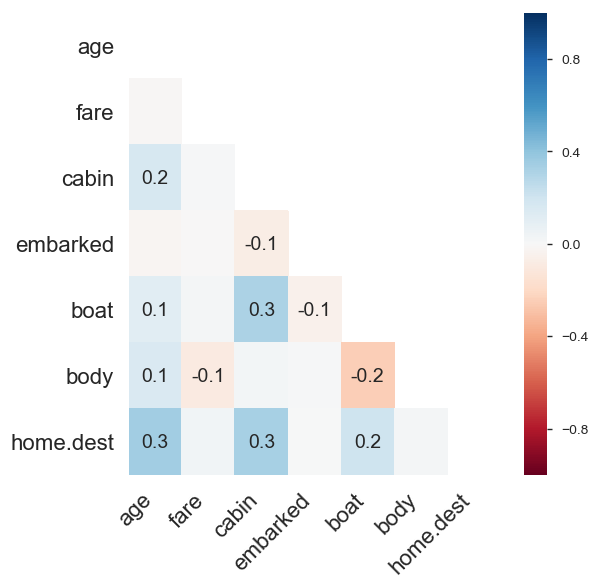

In [36]:
ax = msno.heatmap(df, figsize=(6,6))
ax.get_figure().savefig('mlpr_0404.png')

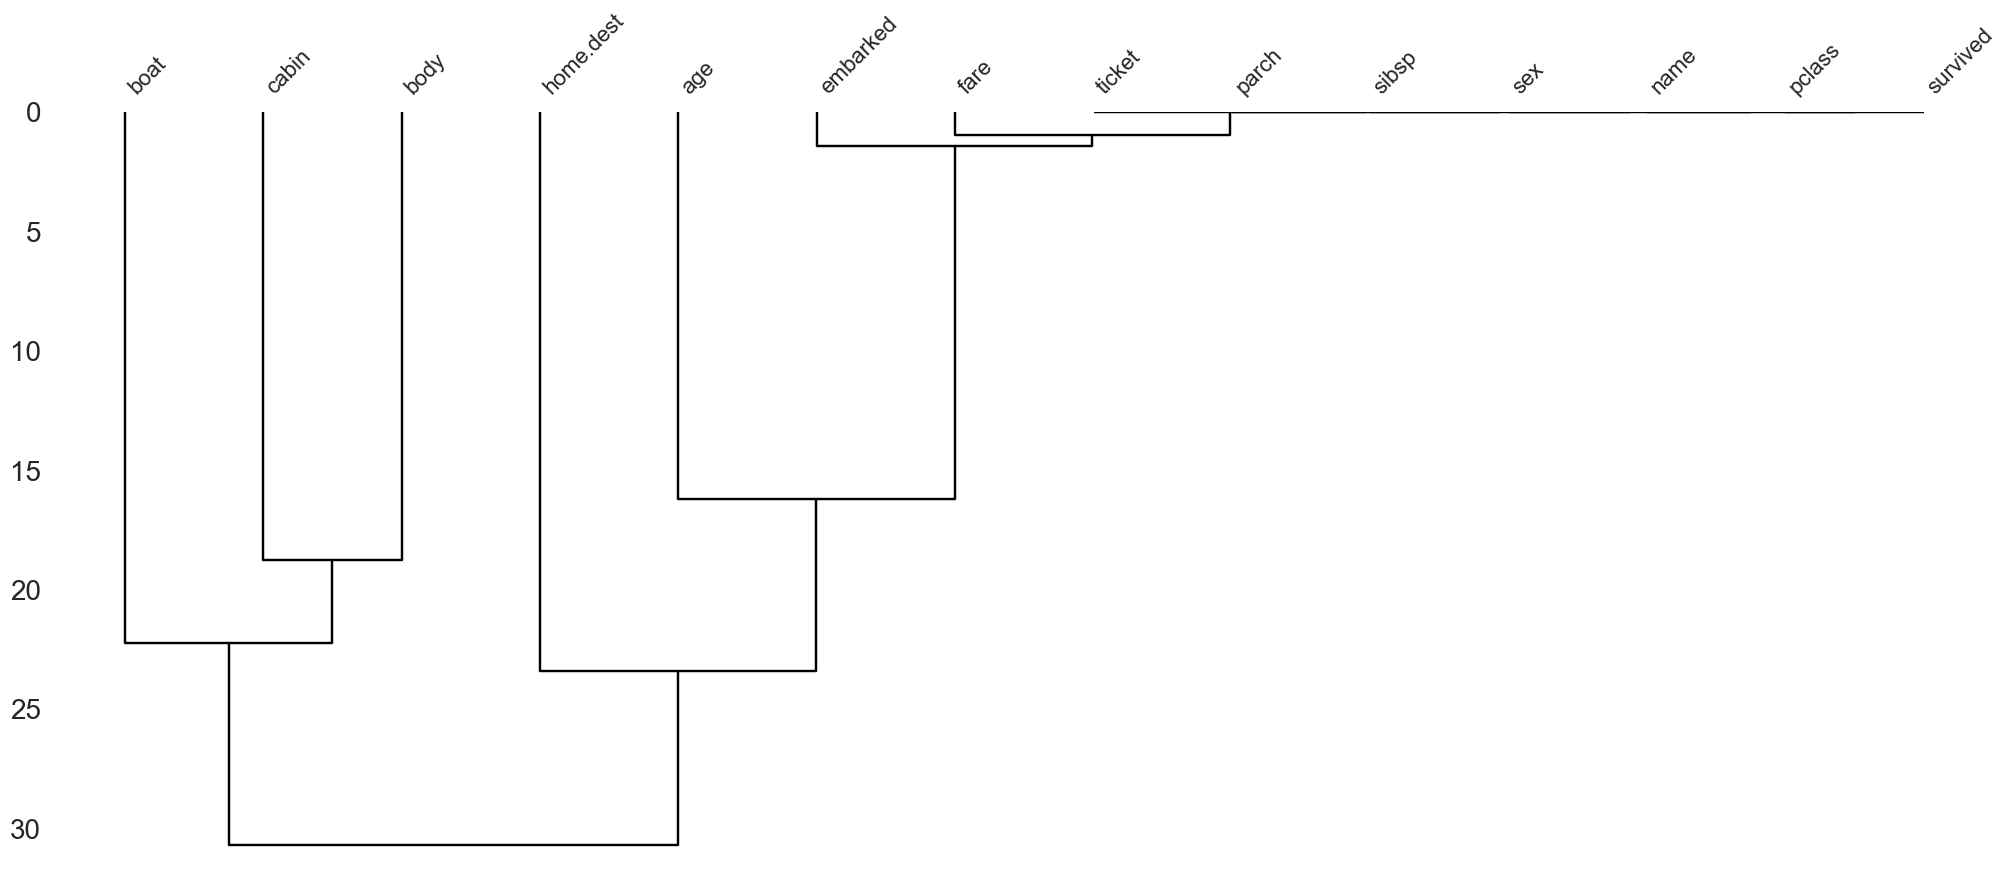

In [37]:
ax = msno.dendrogram(df)
ax.get_figure().savefig('mlpr_0405.png')

In [38]:
df1 = df.drop(columns = ['name', 'ticket', 'home.dest','cabin', 'boat', 'body'])

In [39]:
df1.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S
2,1,0,female,2.0000,1,2,151.5500,S
3,1,0,male,30.0000,1,2,151.5500,S
4,1,0,female,25.0000,1,2,151.5500,S


In [40]:
df.sex.value_counts(dropna=False)

male      843
female    466
Name: sex, dtype: int64

In [41]:
df.embarked.value_counts(dropna=False)

S      914
C      270
Q      123
NaN      2
Name: embarked, dtype: int64

In [42]:
# coloca 0 e 1 nas col que são do tipo objeto/categorical
df1 = pd.get_dummies(df1, drop_first=True)
# o drop eliminou sex_female e embarked_S para não ter valores duplicados

In [43]:
df1.columns

Index(['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'sex_male',
       'embarked_Q', 'embarked_S'],
      dtype='object')

In [44]:
df1.isna().any().any()

True

In [45]:
df1.isnull().sum()

pclass          0
survived        0
age           263
sibsp           0
parch           0
fare            1
sex_male        0
embarked_Q      0
embarked_S      0
dtype: int64

In [79]:
df10 = df1.dropna()

In [80]:
df10.isna().any().any()

False

In [81]:
df10.head()

,pclass,survived,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,1,1,29.0000,0,0,211.3375,0,0,1
1,1,1,0.9167,1,2,151.5500,1,0,1
2,1,0,2.0000,1,2,151.5500,0,0,1
3,1,0,30.0000,1,2,151.5500,1,0,1
4,1,0,25.0000,1,2,151.5500,0,0,1


In [82]:
print(df10.shape)

(1045, 9)


In [83]:
1309-1045

264

In [46]:
df1.head()

,pclass,survived,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,1,1,29.0000,0,0,211.3375,0,0,1
1,1,1,0.9167,1,2,151.5500,1,0,1
2,1,0,2.0000,1,2,151.5500,0,0,1
3,1,0,30.0000,1,2,151.5500,1,0,1
4,1,0,25.0000,1,2,151.5500,0,0,1


In [47]:
y = df1.survived # Target
x = df1.drop(columns='survived') # Variáveis

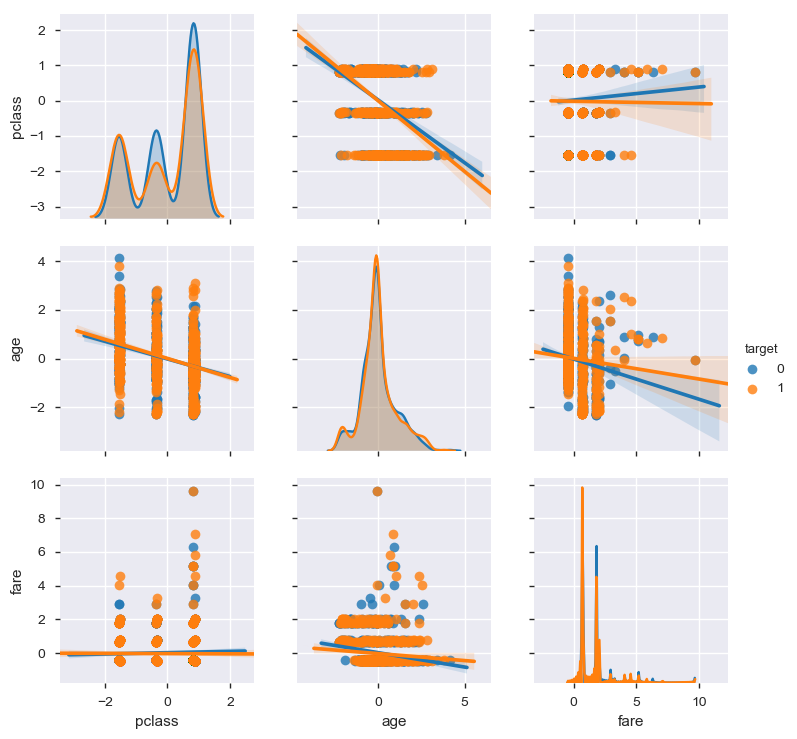

In [85]:
new_df = x.copy()
new_df['target'] = y
vars = ['pclass', 'age', 'fare']
p = sns.pairplot(new_df, vars=vars, hue='target', kind='reg')
p.savefig('mlpr_0606.png', dpi=300)

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [49]:
# coloca valores da mediana nos dados NaN em x q são as variáveis
meds = x_train.median()
x_train = x_train.fillna(meds)
x_test = x_test.fillna(meds)

In [50]:
# Normaliza o conj de dados
cols = 'pclass,age,sibsp,fare,parch,sex_male,embarked_Q,embarked_S'.split(',')
sca = preprocessing.StandardScaler()
x_train = sca.fit_transform(x_train)
x_train = pd.DataFrame(x_train, columns=cols)
x_test = sca.fit_transform(x_test)
x_test = pd.DataFrame(x_test, columns=cols)

C:\Users\LuizFPanza\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\LuizFPanza\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\LuizFPanza\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\LuizFPanza\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [51]:
from sklearn.dummy import DummyClassifier
bm = DummyClassifier()
bm.fit(x_train, y_train)
bm.score(x_test, y_test)

0.5165394402035624

In [52]:
from sklearn import metrics
metrics.precision_score(y_test, bm.predict(x_test))

0.43870967741935485

In [53]:
x = pd.concat([x_train, x_test])
y = pd.concat([y_train, y_test])
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [54]:
! pip install xgboost

In [55]:
import xgboost

In [56]:
for model in [DummyClassifier, LogisticRegression, DecisionTreeClassifier, 
              KNeighborsClassifier, GaussianNB, SVC, RandomForestClassifier, xgboost.XGBClassifier]:
    cls = model()
    kfold = model_selection.KFold(n_splits=10, random_state=42)
    s = model_selection.cross_val_score(cls, x, y, scoring='roc_auc', cv=kfold)
    print (f'{model.__name__:22} AUC:'
           f'{s.mean():.3f} STD: {s.std():.2f}')

DummyClassifier        AUC:0.485 STD: 0.04
LogisticRegression     AUC:0.842 STD: 0.03
DecisionTreeClassifier AUC:0.747 STD: 0.03
KNeighborsClassifier   AUC:0.829 STD: 0.04
GaussianNB             AUC:0.819 STD: 0.04
SVC                    AUC:0.837 STD: 0.04
RandomForestClassifier AUC:0.837 STD: 0.04
XGBClassifier          AUC:0.843 STD: 0.04


In [57]:
! pip install mlxtend

In [58]:
from mlxtend.classifier import StackingClassifier

In [59]:
clfs = [x() for x in [LogisticRegression, DecisionTreeClassifier, 
              KNeighborsClassifier, GaussianNB, SVC, RandomForestClassifier, xgboost.XGBClassifier]]

In [60]:
stack = StackingClassifier(classifiers=clfs, meta_classifier = LogisticRegression())

In [61]:
kfold = model_selection.KFold(n_splits=10, random_state=42)

In [62]:
s = model_selection.cross_val_score(stack, x, y, scoring='roc_auc', cv=kfold)

In [63]:
print (f'{stack.__class__.__name__} '
       f'AUC: {s.mean():.3f} STD: {s.std():.2f}')

StackingClassifier AUC: 0.782 STD: 0.04


In [64]:
rf = ensemble.RandomForestClassifier(n_estimators=100, random_state=42)

In [65]:
rf.fit(x_train, y_train)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', 
                       max_depth=None, max_features='auto', max_leaf_nodes=None, 
                       min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, 
                       min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=10, 
                       n_jobs=1, oob_score=False, random_state=42, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [66]:
rf.score(x_test, y_test)

0.7989821882951654

In [67]:
metrics.precision_score(y_test, rf.predict(x_test))

0.8461538461538461

In [68]:
for col, val in sorted(zip(x_train.columns, rf.feature_importances_, ), key=lambda x: x[1], reverse=True)[:5]:
    print(f'{col:10}{val:10.3f}')

parch          0.285
age            0.260
sex_male       0.237
pclass         0.089
sibsp          0.049


In [69]:
rf4 = ensemble.RandomForestClassifier()
params = {'max_features':[0.4, 'auto'], 'n_estimators':[15,200], 
          'min_samples_leaf':[1, 0.1]}

In [70]:
cv = model_selection.GridSearchCV(rf4, params, n_jobs=-1).fit(x_train, y_train)

In [71]:
print(cv.best_params_)

{'max_features': 0.4, 'min_samples_leaf': 1, 'n_estimators': 200}


In [72]:
rf5 = ensemble.RandomForestClassifier(** {'max_features':0.4, 'n_estimators':200, 
          'min_samples_leaf':1})

In [73]:
rf5.fit(x_train, y_train)
rf5.score(x_test, y_test)

0.8040712468193384

In [74]:
y_pred = rf5.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[202,  22],
       [ 55, 114]], dtype=int64)

C:\Users\LuizFPanza\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


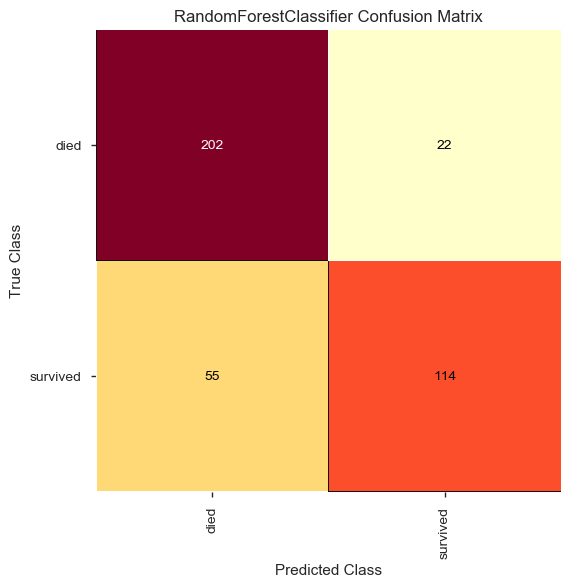

In [75]:
mapping = {0:'died', 1:'survived'}
fig, ax=plt.subplots(figsize=(6,6))
cm_viz = ConfusionMatrix(rf5, classes=['died', 'survived'], label_encoder=mapping)
cm_viz.score(x_test, y_test)
cm_viz.poof()
fig.savefig('mlpr_0304.png', dpi=300, bbox_inches='tight')

C:\Users\LuizFPanza\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


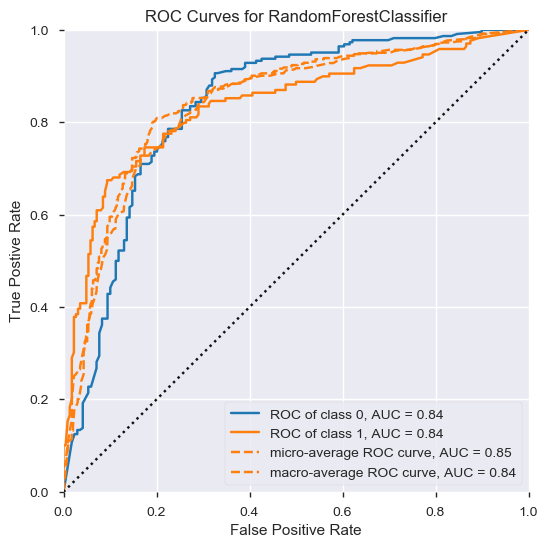

In [76]:
fig, ax = plt.subplots(figsize=(6,6))
roc_viz = ROCAUC(rf5)
roc_viz.score(x_test, y_test)
roc_viz.poof()# põe a legenda
fig.savefig('mplr_0305.png')

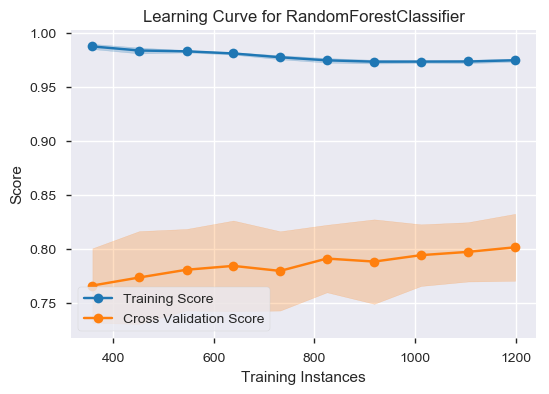

In [77]:
fig, ax = plt.subplots(figsize=(6, 4))
cv = StratifiedKFold(12)
sizes = np.linspace(0.3, 1.0, 10)
lc_viz = LearningCurve(rf5, cv=cv, train_sizes=sizes, scoring='f1_weighted', n_jobs=4, ax=ax)
lc_viz.fit(x, y)
lc_viz.poof()
fig.savefig('mplr_0306.png')

In [78]:
import pickle
pic = pickle.dumps(rf5)
rf6 = pickle.loads(pic)
y_pred = rf6.predict(x_test)
roc_auc_score(y_test, y_pred)

0.7881709636517328